<h1> Dataset Graphs</h1>
<ul>
    <li>Dataset Info</li>
    <li>Products Info</li>
    <li>Customer Info</li>
    <li>Transaction Info</li>
</ul>

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [3]:
# %matplotlib inline # to view the plot in jupter notebook

In [4]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [5]:
# articles_df = pd.read_csv("../../recommender_systems/datasets/articles_sample.csv")
# transaction_df = pd.read_csv("../../recommender_systems/datasets/transactions_sample.csv")
# customers_df = pd.read_csv("../../recommender_systems/datasets/customers_sample.csv")
# pd.set_option("display.max_rows", None)


articles_df = pd.read_csv("../../recommender_systems/datasets/articles_transactions_5.csv")
transaction_df = pd.read_csv("../../recommender_systems/datasets/transactions_5.csv")
customers_df = pd.read_csv("../../recommender_systems/datasets/customers.csv")
pd.set_option("display.max_rows", None)
f = pd.read_csv("../../recommender_systems/datasets/articles.csv")

<h2>Products Info</h2>

In [6]:
f.shape

(105542, 25)

In [5]:
articles_df.columns

Index(['Unnamed: 0', 'article_id', 'product_code', 'prod_name',
       'product_type_no', 'product_type_name', 'product_group_name',
       'graphical_appearance_no', 'graphical_appearance_name',
       'colour_group_code', 'colour_group_name', 'perceived_colour_value_id',
       'perceived_colour_value_name', 'perceived_colour_master_id',
       'perceived_colour_master_name', 'department_no', 'department_name',
       'index_code', 'index_name', 'index_group_no', 'index_group_name',
       'section_no', 'section_name', 'garment_group_no', 'garment_group_name',
       'detail_desc'],
      dtype='object')

In [8]:
articles_df.shape

(26722, 26)

In [9]:
product_group_data = articles_df['product_group_name'].value_counts(dropna=False).nlargest(9)

In [10]:
product_group_data

Garment Upper body    10097
Garment Lower body     5508
Garment Full body      3598
Accessories            2760
Underwear              1495
Shoes                  1055
Swimwear                987
Socks & Tights          722
Nightwear               341
Name: product_group_name, dtype: int64

In [11]:
 # Other are the <OTHER products> in the pie chart - It was too large  to fit in thhe Piechar s so 
    # we chose 9 largers and the rest of them are OTHERS , We sub all of the others Count and called it the others

In [12]:
product_group_data['Others'] = sum(articles_df['product_group_name'].value_counts(dropna=False).nsmallest(8).values)

In [13]:
product_group_data['Others']

159

In [14]:
labels = product_group_data.keys()

In [15]:
print(product_group_data)

Garment Upper body    10097
Garment Lower body     5508
Garment Full body      3598
Accessories            2760
Underwear              1495
Shoes                  1055
Swimwear                987
Socks & Tights          722
Nightwear               341
Others                  159
Name: product_group_name, dtype: int64


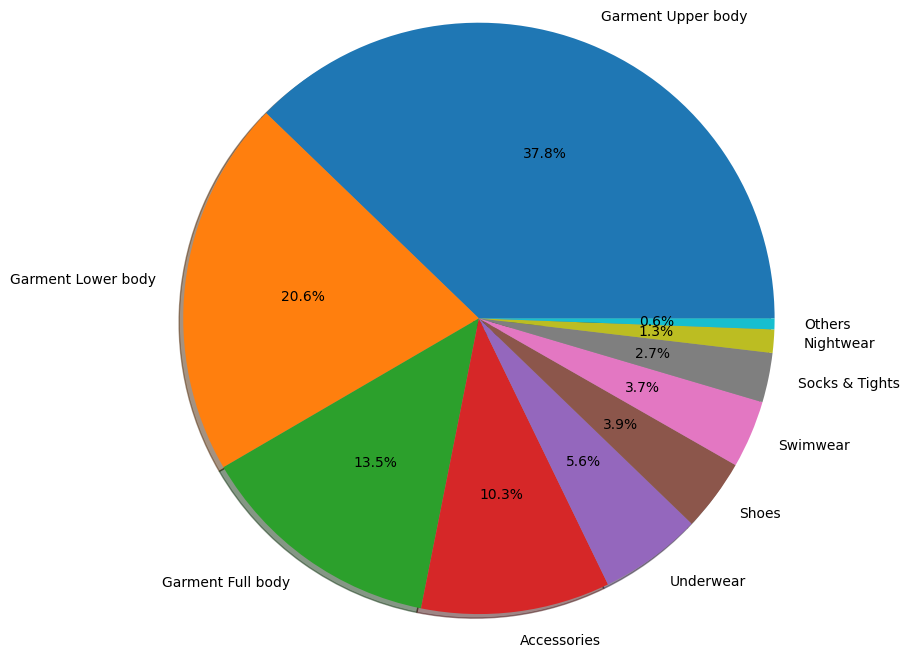

In [16]:

plt.pie(product_group_data,labels = labels,radius=2, autopct='%1.1f%%',shadow=True)
plt.show()

In [17]:
product_type_data = articles_df['product_type_name'].value_counts(dropna=False).nlargest(14)

In [18]:
product_type_data['Others'] = sum(articles_df['product_type_name'].value_counts(dropna=False)[14:].values)

In [19]:
type_labels = product_type_data.keys()

In [20]:
print(product_type_data)

Trousers            3376
Dress               3122
Sweater             1951
T-shirt             1606
Top                 1173
Blouse              1120
Jacket               975
Skirt                847
Shirt                815
Shorts               808
Vest top             782
Underwear bottom     715
Bra                  663
Socks                559
Others              8210
Name: product_type_name, dtype: int64


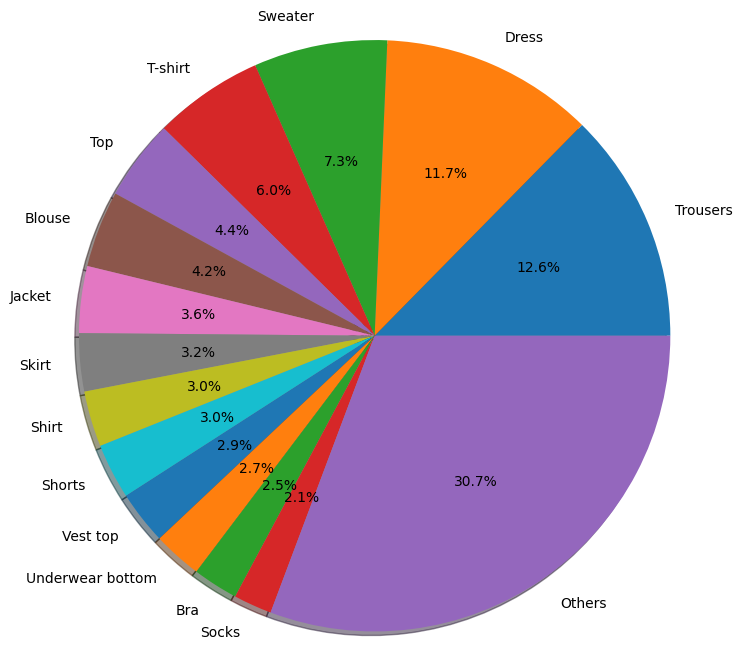

In [30]:
colors = list(mcolors.TABLEAU_COLORS.keys())
plt.pie(product_type_data,labels = type_labels,radius=2, autopct='%1.1f%%',shadow=True,colors = colors)
plt.show()

In [35]:
articles_df['colour_group_name'].value_counts(dropna=False).count()

49

In [36]:
product_colors = articles_df['colour_group_name'].value_counts(dropna=False)

<AxesSubplot: title={'center': 'Product Colors'}, xlabel='Number of products', ylabel='Colors'>

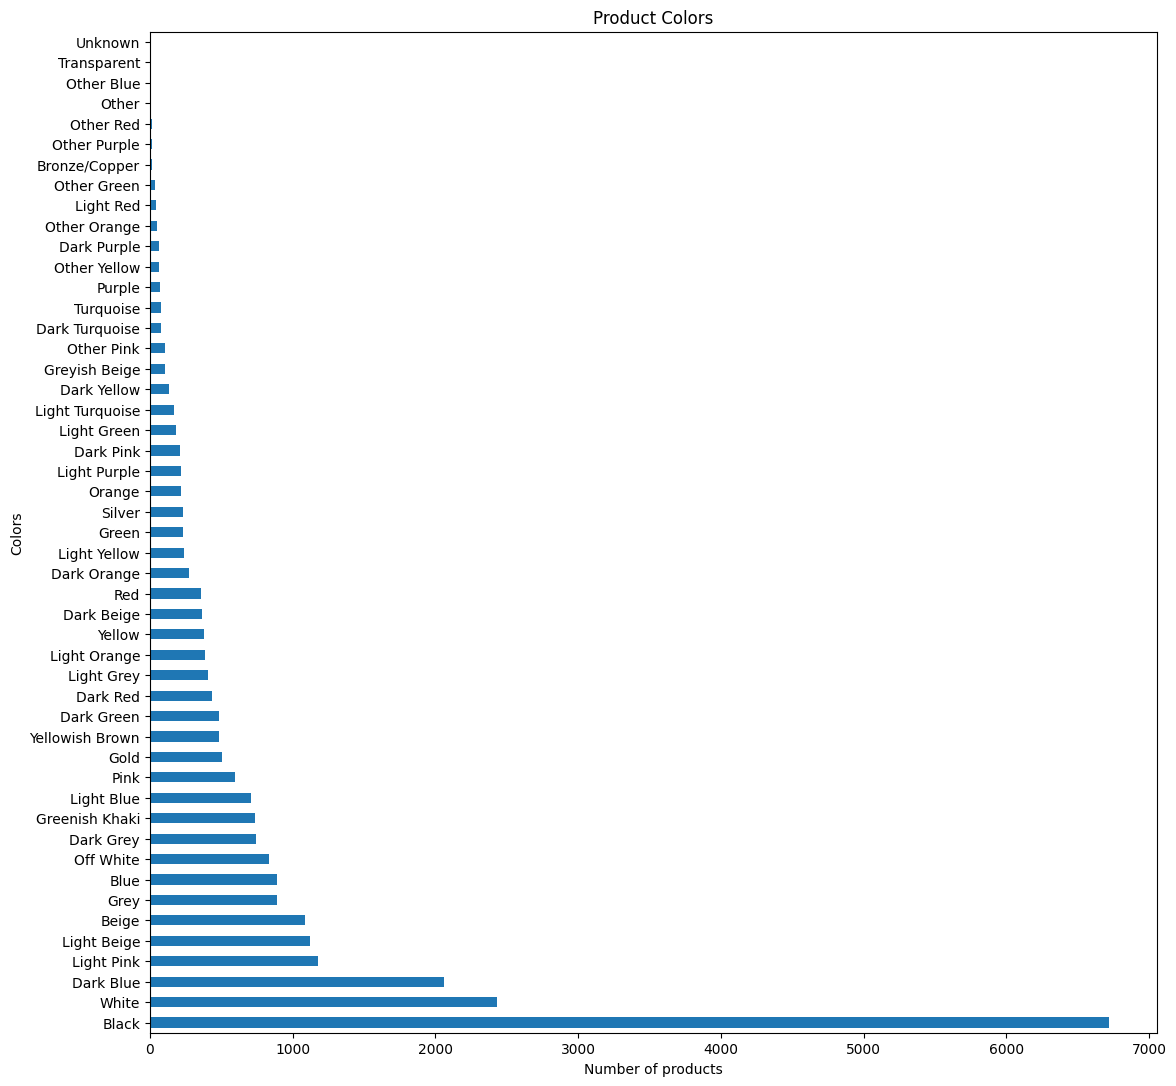

In [37]:
product_colors.plot(kind='barh',figsize=(13, 13),title="Product Colors",ylabel="Colors",xlabel="Number of products") # (w,h)

In [38]:
merged_df = transaction_df.merge(articles_df ,left_on='article_id', right_on='article_id')

<AxesSubplot: title={'center': 'Top 5 most purchased colors'}, xlabel='Colors', ylabel='Number of times Sold'>

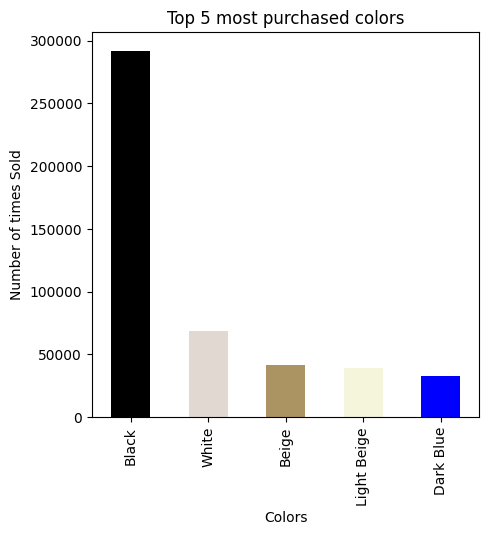

In [39]:
barcolors = ['#000000','#E1D9D1','#AC9362','#F5F5DC','#0000FF']
merged_df['colour_group_name'].value_counts().nlargest(5).plot(kind='bar',figsize=(5, 5),title="Top 5 most purchased colors",color = barcolors,ylabel="Number of times Sold",xlabel="Colors")

<AxesSubplot: title={'center': 'Top 5 most purchased Group'}, xlabel='Product Groups', ylabel='Number of times purchased'>

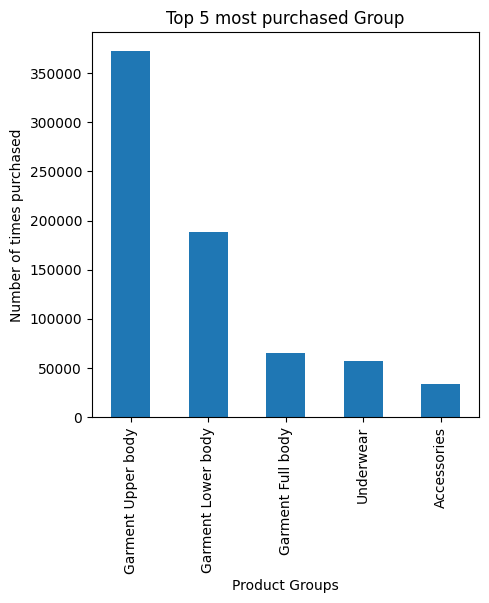

In [40]:
# top 5 most purchased garment
merged_df['product_group_name'].value_counts().nlargest(5).plot(kind='bar',figsize=(5, 5),title="Top 5 most purchased Group",ylabel="Number of times purchased",xlabel="Product Groups")

<AxesSubplot: title={'center': 'top 5 most purchased Garment'}, xlabel='Product Type', ylabel='Number of times purchased'>

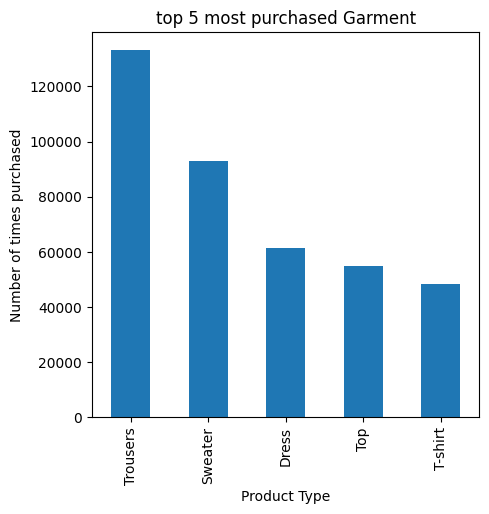

In [41]:
# top 5 most purchased typ
merged_df['product_type_name'].value_counts().nlargest(5).plot(kind='bar',figsize=(5, 5),title="top 5 most purchased Garment",ylabel="Number of times purchased",xlabel="Product Type")

<h2>Customer Info</h2>

In [42]:
transaction_df['customer_id'].drop_duplicates().shape

(84234,)

In [43]:
customers_df.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [44]:
customers_df.shape

(1371980, 7)

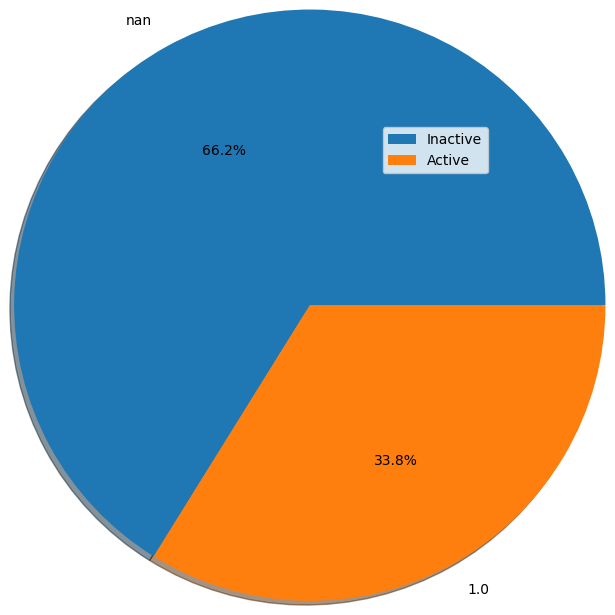

In [45]:
active_customers = customers_df['Active'].value_counts(dropna=False)
active_customers_labels = customers_df['Active'].value_counts(dropna=False).keys()
plt.pie(active_customers,labels=active_customers_labels,radius=2, autopct='%1.1f%%',shadow=True)
plt.legend(['Inactive','Active'])
plt.show()

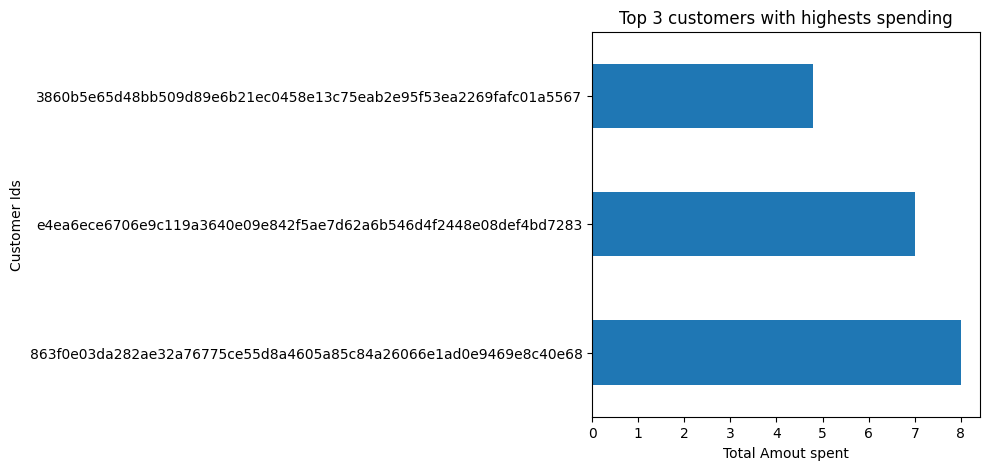

In [46]:
top_cust = transaction_df.groupby('customer_id')['price'].aggregate('sum').nlargest(3)
top_cust.plot(kind='barh',figsize=(5, 5),title="Top 3 customers with highests spending",ylabel="Customer Ids",xlabel="Total Amout spent")
plt.show()
# top 3 customers with highests purchases

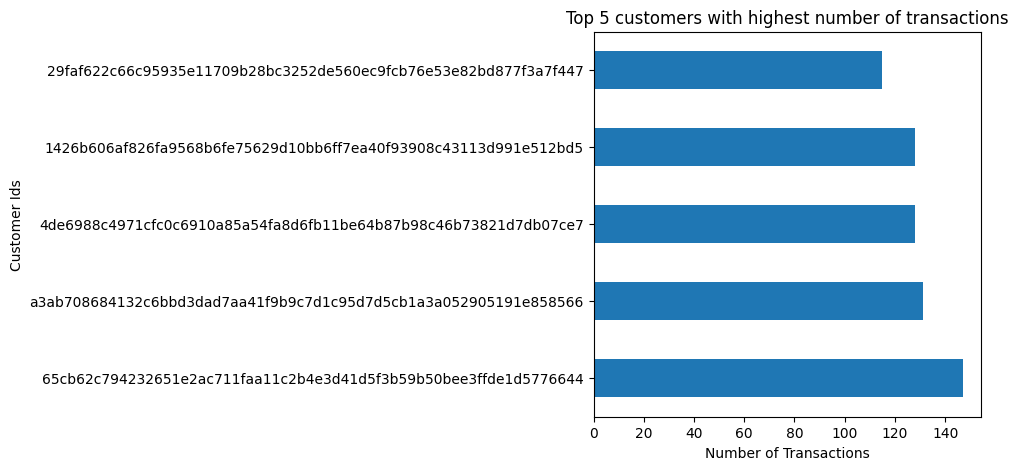

In [47]:
top_freq_cust = transaction_df['customer_id'].value_counts(dropna=False).nlargest(5)
top_freq_cust.plot(kind='barh',figsize=(5, 5),title="Top 5 customers with highest number of transactions",ylabel="Customer Ids",xlabel="Number of Transactions")
plt.show()

In [48]:

transaction_df.groupby('customer_id')['price'].aggregate('sum').describe()


count    84234.000000
mean         0.308669
std          0.254758
min          0.008390
25%          0.160915
50%          0.237136
75%          0.369271
max          8.007898
Name: price, dtype: float64

<h2>Transaction Info</h2>

In [49]:
transaction_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 't_dat', 'customer_id', 'article_id',
       'price', 'sales_channel_id'],
      dtype='object')

In [61]:
transaction_df.shape

(788257, 7)

In [50]:
transaction_df['t_dat'].min()

'2020-08-23'

In [51]:
transaction_df['t_dat'].max()

'2020-09-22'

In [52]:
# shows how many items were bought per percentage of customer
# Number of items purchased by the customers on avrage
transaction_df.groupby('customer_id')['article_id'].count().describe()

count    84234.000000
mean         9.357943
std          6.146351
min          5.000000
25%          6.000000
50%          7.000000
75%         11.000000
max        147.000000
Name: article_id, dtype: float64

In [53]:
transaction_df.groupby('customer_id')['price'].sum().describe()

count    84234.000000
mean         0.308669
std          0.254758
min          0.008390
25%          0.160915
50%          0.237136
75%          0.369271
max          8.007898
Name: price, dtype: float64

<h2>Sparsity</h2>

In [76]:
all_customers = transaction_df['customer_id'].drop_duplicates().count()
all_products = articles_df['article_id'].count()
all_transactions = transaction_df['customer_id'].count()



In [77]:
all_customers

84234

In [78]:
all_products

26722

In [79]:
all_transactions

788257

In [80]:
x = all_products * all_customers

<p>
    Sparsity = 1 - Purchases / Possible Purchases
    
    Sparsity = 1 -  all of the trans actions
                   Number of Customers * All Products  
</p>

In [81]:
y = all_transactions/x

In [82]:
1- y * 100

0.9649803781592259